**Dumped the Data in SQL**

In [1]:
pip install pyMYSQL

   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 217.9 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/45.0 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 315.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pymysql
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sellers'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('order_items.csv', 'order_items'),
    ('payments.csv', 'payments')
]

# Connect to the MySQL database using PyMySQL
conn = pymysql.connect(
    host='localhost',
    user='root',
    password='BADass659#',
    database='ecommerce',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.Cursor
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'E:/DSAI/Buisness Intelligence/myProject/Ecommerce'

# Function to map pandas dtypes to SQL types
def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

# Loop through each CSV file
for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    print(f"\n📂 Processing file: {csv_file}")

    # Read CSV into DataFrame
    df = pd.read_csv(file_path)
    df = df.where(pd.notnull(df), None)  # Replace NaN with None

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Create table schema
    column_defs = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_query = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({column_defs})"
    cursor.execute(create_query)

    # Prepare insert statement
    placeholders = ', '.join(['%s'] * len(df.columns))
    columns_str = ', '.join([f'`{col}`' for col in df.columns])
    insert_query = f"INSERT INTO `{table_name}` ({columns_str}) VALUES ({placeholders})"

    # Convert DataFrame to list of tuples
    data = [tuple(None if pd.isna(x) else x for x in row) for row in df.to_numpy()]

    # Bulk insert
    cursor.executemany(insert_query, data)
    conn.commit()
    print(f"✅ Inserted {len(data)} rows into `{table_name}`")

# Close connection
cursor.close()
conn.close()
print("\n✅ All files processed successfully.")



def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'


for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)

    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'{col} {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS {table_name} ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO {table_name} ({', '.join(['' + col + '' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()



📂 Processing file: customers.csv
✅ Inserted 99441 rows into `customers`

📂 Processing file: orders.csv
✅ Inserted 99441 rows into `orders`

📂 Processing file: sellers.csv
✅ Inserted 3095 rows into `sellers`

📂 Processing file: products.csv
✅ Inserted 32951 rows into `products`

📂 Processing file: geolocation.csv
✅ Inserted 1000163 rows into `geolocation`

📂 Processing file: order_items.csv
✅ Inserted 112650 rows into `order_items`

📂 Processing file: payments.csv
✅ Inserted 103886 rows into `payments`

✅ All files processed successfully.
Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64



ProgrammingError: Cursor closed

### <center>Beginner's Query</center>

1. List all unique cities where customers are located.
2. Count the number of orders placed in 2017.
3. Find the total sales per category.
4. Calculate the percentage of orders that were paid in installments.
5. Count the number of customers from each state.
   

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import numpy as np


In [3]:
db = pymysql.connect(
    host='localhost',
    user='root',
    password='BADass659#',
    database='ecommerce',
    cursorclass=pymysql.cursors.Cursor
)

cursor=db.cursor() 


### List all unique cities where customers are located.


In [8]:
query= """ select distinct(customer_city) from Customers"""
cursor.execute(query)
data = cursor.fetchall()
data

(('franca',),
 ('sao bernardo do campo',),
 ('sao paulo',),
 ('mogi das cruzes',),
 ('campinas',),
 ('jaragua do sul',),
 ('timoteo',),
 ('curitiba',),
 ('belo horizonte',),
 ('montes claros',),
 ('rio de janeiro',),
 ('lencois paulista',),
 ('caxias do sul',),
 ('piracicaba',),
 ('guarulhos',),
 ('pacaja',),
 ('florianopolis',),
 ('aparecida de goiania',),
 ('santo andre',),
 ('goiania',),
 ('cachoeiro de itapemirim',),
 ('sao jose dos campos',),
 ('sao roque',),
 ('camacari',),
 ('resende',),
 ('sumare',),
 ('novo hamburgo',),
 ('sao luis',),
 ('sao jose',),
 ('santa barbara',),
 ('ribeirao preto',),
 ('ituiutaba',),
 ('taquarituba',),
 ('sao jose dos pinhais',),
 ('barrinha',),
 ('parati',),
 ('dourados',),
 ('trindade',),
 ('cascavel',),
 ('fortaleza',),
 ('brasilia',),
 ('pelotas',),
 ('porto alegre',),
 ('salto',),
 ('jundiai',),
 ('cacapava',),
 ('sao vicente',),
 ('uberlandia',),
 ('botelhos',),
 ('sao goncalo',),
 ('araucaria',),
 ('nova iguacu',),
 ('areia branca',),
 ('campo

### Count the number of orders placed in 2017.

In [15]:
query = """ select count(order_id) from orders where year (order_purchase_timestamp)=2017"""
cursor.execute(query)
data = cursor.fetchall()
data
"total orders place in 2017 are", data[0][0]

('total orders place in 2017 are', 45101)

### Find the total sales per category.

In [11]:
query = """ select upper(products.product_category) category,
round(sum(payments.payment_value),2) sales
from products join order_items
on products.product_id = order_items.product_id
join payments 
on payments.order_id=order_items.order_id
group by category"""
cursor.execute(query)
data = cursor.fetchall()

df=pd.DataFrame(data, columns=["Category","Sales"])
df

,Category,Sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,FASHION BAGS AND ACCESSORIES,218158.28
4,BED TABLE BATH,1712553.67
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


### Calculate the percentage of orders that were paid in installments.

In [14]:
query = """select (sum(case when payment_installments >= 1 then 1
else 0 end))/count(*)*100 from payments
"""
cursor.execute(query)
data = cursor.fetchall()
"the percentage of orders that were paid in installments is ", data [0][0]


('the percentage of orders that were paid in installments is ',
 Decimal('99.9981'))

### Count the number of customers from each state.

<function matplotlib.pyplot.show(close=None, block=None)>

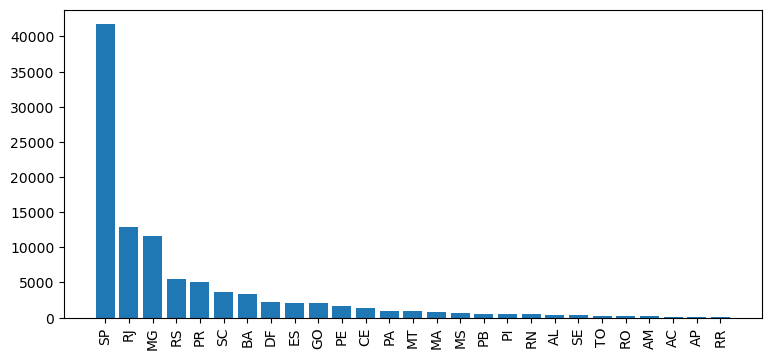

In [20]:
query = """ select customer_state, count(customer_id)
from customers group by customer_state"""
cursor.execute(query)
data = cursor.fetchall()

df=pd.DataFrame(data, columns=["State","Customer Count"])
df=df.sort_values(by = "Customer Count", ascending=False) 
df
plt.figure(figsize=(9,4))
plt .bar(df["State"],df["Customer Count"])
plt.xticks(rotation = 90)
plt.show

## <center>Intermediate</center>
1. Calculate the number of orders per month in 2018.
2. Find the average number of products per order, grouped by customer city.
3. Calculate the percentage of total revenue contributed by each product category.
4. Identify the correlation between product price and the number of times a product has been purchased.
5. Calculate the total revenue generated by each seller, and rank them by reve2018.

### Calculate the number of orders per month in 2018.

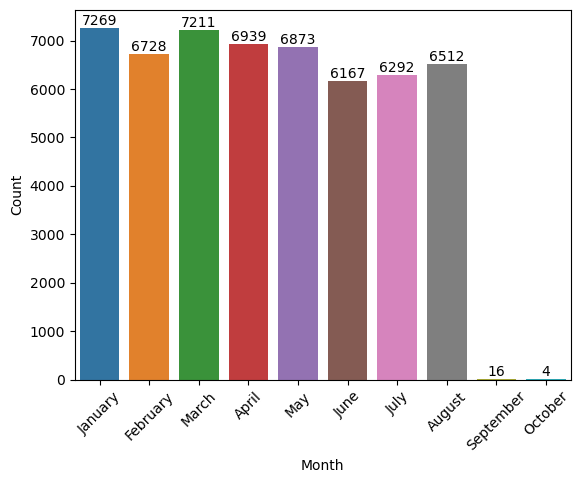

In [17]:
query = """ select monthname(order_purchase_timestamp) Month, count(order_id) Count
from orders where year(order_purchase_timestamp)=2018
group by Month"""
cursor.execute(query)
data = cursor.fetchall()
df=pd.DataFrame(data,columns=["Month","Count"])
df
o=["January","February","March","April","May","June","July","August","September","October"]

ax=sns.barplot(x=df["Month"],y=df["Count"],data=df ,order=o)
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()

### Find the average number of products per order, grouped by customer city.

In [4]:
query= """ WITH count_per_order AS (
    SELECT 
        orders.order_id,
        orders.customer_id,
        COUNT(order_items.order_id) AS oc
    FROM orders
    JOIN order_items ON orders.order_id = order_items.order_id
    GROUP BY orders.order_id, orders.customer_id
)

SELECT 
    customers.customer_city, 
    ROUND(AVG(count_per_order.oc), 2) AS average_orders
FROM customers
JOIN count_per_order ON customers.customer_id = count_per_order.customer_id
GROUP BY customers.customer_city;
"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["Customer_city","Count_of_order"])
df

,Customer_city,Count_of_order
0,sao jose dos campos,1.14
1,indaial,1.12
2,treze tilias,1.27
3,sao paulo,1.16
4,rio de janeiro,1.15
...,...,...
4105,buriti,3.00
4106,morro agudo de goias,1.00
4107,santa filomena,1.00
4108,guamiranga,1.00


### Calculate the percentage of total revenue contributed by each product category.

In [9]:
query= """ SELECT 
    UPPER(products.product_category) AS category,
    ROUND(
        (SUM(payments.payment_value) / (SELECT SUM(payment_value) FROM payments)) * 100, 
        2
    ) AS sales
FROM products 
JOIN order_items ON products.product_id = order_items.product_id
JOIN payments ON payments.order_id = order_items.order_id
GROUP BY UPPER(products.product_category);

"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["Category","sales%"])
df

,Category,sales%
0,PERFUMERY,3.17
1,FURNITURE DECORATION,8.93
2,TELEPHONY,3.04
3,FASHION BAGS AND ACCESSORIES,1.36
4,BED TABLE BATH,10.70
...,...,...
69,CDS MUSIC DVDS,0.01
70,LA CUISINE,0.02
71,FASHION CHILDREN'S CLOTHING,0.00
72,PC GAMER,0.01


### Identify the correlation between product price and the number of times a product has been purchased.

In [14]:
query= """ select (products.product_category) As category,
count(order_items.product_id) As order_count,
round(avg(order_items.price),2) As Price
from products join order_items
on products.product_id= order_items.product_id
group by products.product_category;
"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["Category","Order_count","Price"])

arr1=df["Order_count"]
arr2=df["Price"]
a=np.corrcoef([arr1,arr2])
print("The Correlation between Price and order count is",a[0,-1])


The Correlation between Price and order count is -0.10631514167157562


### Calculate the total revenue generated by each seller, and rank them by reve2018.

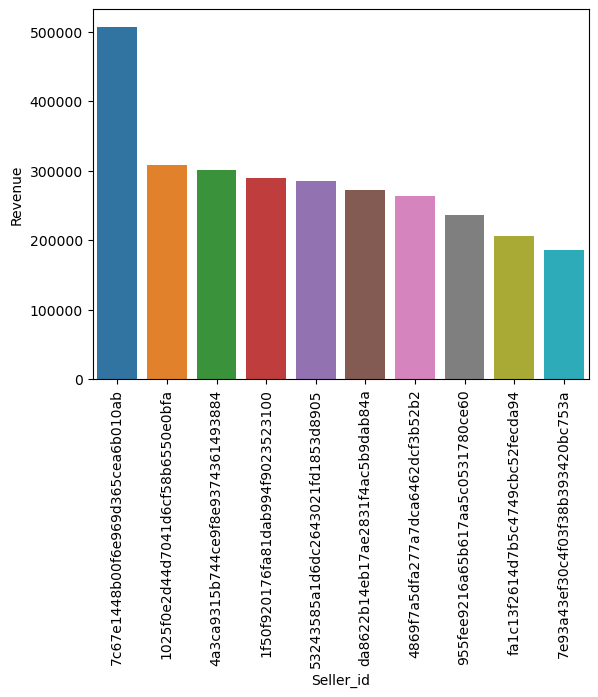

In [24]:
query="""select *, dense_rank() over (order by revenue desc) as Rn from 
(Select order_items.seller_id, round(sum(payments.payment_value),2) as Revenue
from order_items join payments
on order_items.order_id=payments.order_id
group by order_items.seller_id) as a
"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["Seller_id","Revenue","Rank"])
df=df.head(10)
sns.barplot(x="Seller_id",y="Revenue",data=df)
plt.xticks(rotation = 90)
plt.show()

### <center>Advanced Queries</center>

1. Calculate the moving average of order values for each customer over their order history.
2. Calculate the cumulative sales per month for each year.
3. Calculate the year-over-year growth rate of total sales.
4. Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.
5. Identify the top 3 customers who spent the most money in each year.

#### Calculate the moving average of order values for each customer over their order history.

C:\Users\Misbah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Misbah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Misbah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Misbah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

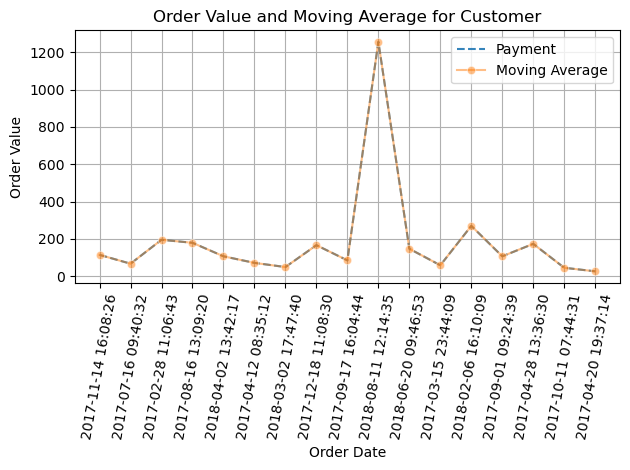

In [36]:
#Calculate the moving average of order values for each customer over their order history.
query="""select 
customer_id,
order_purchase_timestamp,
payment,
avg(payment) over(
partition by customer_id 
order by order_purchase_timestamp
rows between 2 preceding and current row) as moving_avg
from
(select orders.customer_id,
orders.order_purchase_timestamp,
payments.payment_value as Payment
from payments join orders
on payments.order_id=orders.order_id) as a;
"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["customer_id","order_purchase_timestamp","payment","moving_avg"])
df=df.head(20)
df

sns.lineplot(data=df, x='order_purchase_timestamp', y='payment', label='Payment', linestyle='--',alpha=0.9)
sns.lineplot(data=df, x='order_purchase_timestamp', y='moving_avg', label='Moving Average', marker='o',alpha=0.5)

plt.title('Order Value and Moving Average for Customer')
plt.xlabel('Order Date')
plt.ylabel('Order Value')
plt.xticks(rotation=80)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Calculate the cumulative sales per month for each year

C:\Users\Misbah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Misbah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


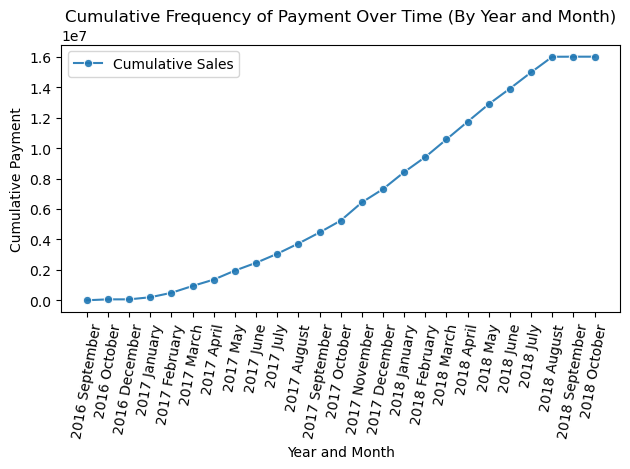

In [37]:
query="""select years, months,month_name, payment, sum(payment)
over (order by years, months) cumulative_sales from 
(select 
year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
monthname(orders.order_purchase_timestamp)as month_name,
round(sum(payments.payment_value),2) as payment 
from orders join payments
on orders.order_id=payments.order_id
group by years, months, month_name order by years, months, month_name)as a;"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["years","months","month_name","payment","cumulative_sales"])
# Create a new column that combines the year and month for better visualization
df['year_month'] = df['years'].astype(str) + ' ' + df['month_name']

# Create a line plot for cumulative sales with year and month on the x-axis
sns.lineplot(data=df, x='year_month', y='cumulative_sales', label='Cumulative Sales', marker='o', alpha=0.9)

# Set the plot title and labels
plt.title('Cumulative Frequency of Payment Over Time (By Year and Month)')
plt.xlabel('Year and Month')
plt.ylabel('Cumulative Payment')
plt.xticks(rotation=80)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### Calculate the year-over-year growth rate of total sales.

In [39]:
query="""select year,payment,lag(payment,1)
over (order by year) as previous_year,
round(((payment-lag(payment,1) over (order by year))/lag(payment,1) over (order by year))*100,2) as yoy_growth
from 
(select year(orders.order_purchase_timestamp) as year,
round(sum(payments.payment_value),2) as payment 
from orders join payments
on orders.order_id=payments.order_id
group by year order by year) as a;"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["year","payment","previous_year","yoy_growth"])
df


,year,payment,previous_year,yoy_growth
0,2016,59362.34,NaN,NaN
1,2017,7249746.73,59362.34,12112.7
2,2018,8699763.05,7249746.73,20.0


### Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [43]:
query="""WITH a AS (
    SELECT 
        customers.customer_id,
        MIN(orders.order_purchase_timestamp) AS first_order
    FROM orders 
    JOIN customers ON orders.customer_id = customers.customer_id
    GROUP BY customers.customer_id
),
b AS (
    SELECT 
        a.customer_id, 
        COUNT(DISTINCT orders.order_purchase_timestamp) AS next_order
    FROM a 
    JOIN orders ON orders.customer_id = a.customer_id
        AND orders.order_purchase_timestamp > a.first_order
        AND orders.order_purchase_timestamp < DATE_ADD(a.first_order, INTERVAL 6 MONTH)
    GROUP BY a.customer_id
)

SELECT 
    ROUND(100 * COUNT(DISTINCT b.customer_id) / COUNT(DISTINCT a.customer_id), 2) AS repeat_rate_percentage
FROM a 
LEFT JOIN b ON a.customer_id = b.customer_id;"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["repeat_rate_percentage"])
print(df)
print("since none of our customer repeated thats why our value is null")

  repeat_rate_percentage
0                   0.00
since none of our customer repeated thats why our value is null


### Identify the top 3 customers who spent the most money in each year

In [4]:
query="""select years, customer_id,payments,d_rank
from 

(select year(orders.order_purchase_timestamp) as years,
orders.customer_id,
round(sum(payments.payment_value),2) as payments,
dense_rank() over (partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank 
from orders join payments
on payments.order_id=orders.order_id
group by orders.order_purchase_timestamp,
orders.customer_id) as a
where d_rank <=3;
"""
cursor.execute(query)
data = cursor.fetchall()
data
df=pd.DataFrame(data,columns=["years","customer_id","payments","d_rank"])
df



,years,customer_id,payments,d_rank
0,2016,a9dc96b027d1252bbac0a9b72d837fc6,1423.55,1
1,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1400.74,2
2,2016,4a06381959b6670756de02e07b83815f,1227.78,3
3,2017,1617b1357756262bfa56ab541c47bc16,13664.08,1
4,2017,c6e2731c5b391845f6800c97401a43a9,6929.31,2
5,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66,3
6,2018,ec5b2ba62e574342386871631fafd3fc,7274.88,1
7,2018,f48d464a0baaea338cb25f816991ab1f,6922.21,2
8,2018,e0a2412720e9ea4f26c1ac985f6a7358,4809.44,3


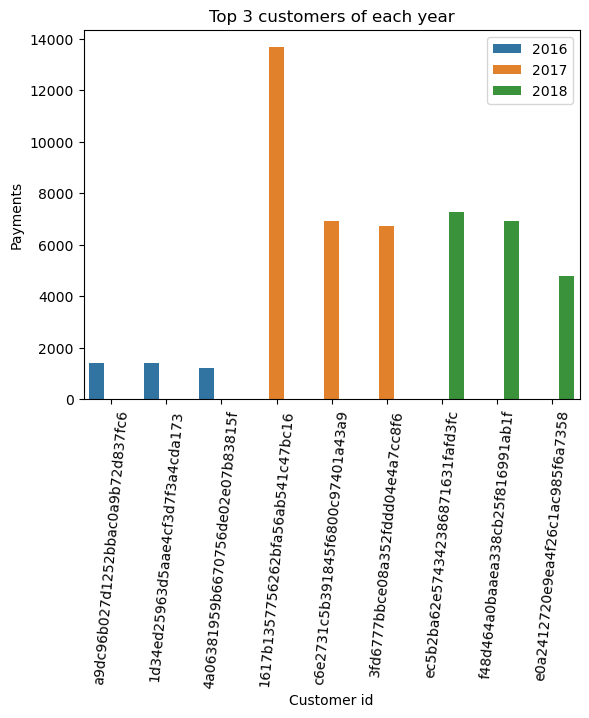

In [14]:
# Fix: Ensure 'years' is a string
df['years'] = df['years'].astype(str)

sns.barplot(x="customer_id", y="payments", hue='years', data=df)
# Set the plot title and labels
plt.title('Top 3 customers of each year')
plt.xlabel('Customer id')
plt.ylabel('Payments')
plt.xticks(rotation=85)
plt.legend()

# Display the plot
plt.show()